# モジュールのインポート

In [1]:
import re
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# from tslearn.preprocessing import TimeSeriesScalerMeanVariance
# from tslearn.clustering import TimeSeriesKMeans

import openpyxl
from openpyxl.drawing.line import LineProperties
from openpyxl.chart.shapes import GraphicalProperties
from openpyxl.chart.text import RichText
from openpyxl.drawing.text import Paragraph, ParagraphProperties, CharacterProperties, Font

# 必要情報を入力

In [2]:
# 各フォルダの読み込み
# folder_list = glob.glob(r'C:\Users\west7\OneDrive\デスクトップ\raman処理用\data\*')
folder_list = glob.glob(r'C:\Users\r-swx\OneDrive\デスクトップ\raman_data\data\*')

# データの区切りを指定（タブ：'\t', コンマ：',', セミコロン：';'）
sep = '[,;\t]'

# excelファイルの保存先のパス
# excel_path = r'C:\Users\west7\OneDrive\デスクトップ\raman処理用\\'
excel_path = r'C:\Users\r-swx\OneDrive\デスクトップ\raman_data\\'

# データの読み込み

In [3]:
file_dic = {}
for n, folder in enumerate(folder_list):
    file_dic[f'data_{n+1}'] = glob.glob(folder + '\*')

df_list = []

for folder in file_dic:
    # フォルダ内にファイルがある場合
    if len(file_dic[folder]) > 0:
        # 各種データ保存用のディクショナリを作成
        data_dic = {}
        
        # テクストファイルの読み込み
        for file in file_dic[folder]:
            # ファイル名の切り取り
            file_name = re.split('[\\\\.]', file)[8]

            # 一時保存用リストの作成
            temp_list = []

            # スペクトルデータの読み込み
            with open(file, encoding='utf-8') as f:
                for row in f:
                    row = row.strip()
                    temp_list.append(re.split(sep, row)) 
            temp_list = temp_list[32:1069]

            # ディクショナリへデータの格納
            data_dic[file_name] = temp_list

        # 空のデータフレームを作成
        df = pd.DataFrame()

        # フォルダ内データをデータフレームに追加
        for key in data_dic:
            intensity_list = []
            wave_list = []

            for n in range(len(data_dic[key])):
                intensity_list.append(data_dic[key][n][3])

            for n in range(len(data_dic[key])):
                wave_list.append(data_dic[key][n][0])

            df['Raman Shift'] = wave_list
            df[key] = intensity_list

        df = df.astype(float)
        df = df.sort_values(by=['Raman Shift'], ascending=True).reset_index(drop=True)

        df_list.append(df)

    else:
        break

# グラフの可視化

In [11]:
# X軸の最大・最小の設定
XLIM_MIN = 0
XLIM_MAX = 1
# Y軸の最大・最小の設定
YLIM_MIN = -1000
YLIM_MAX = 4000
# 軸ラベルの設定
XLABEL = 'Raman Shift [cm^-1]'
YLABEL = 'Intensity [a.u.]'
# グラフサイズ
GRAPH_SIZE = (8, 6)
# フォントサイズ
FONTS_SIZE = 14

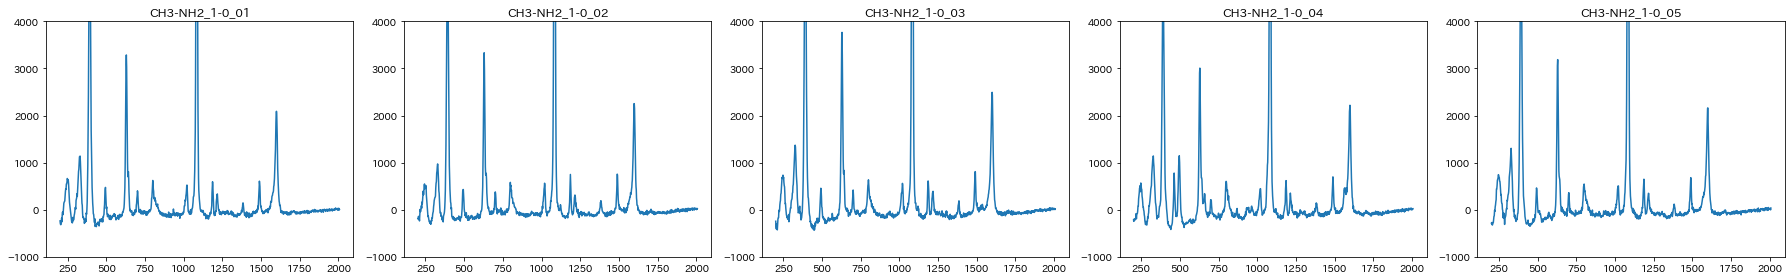

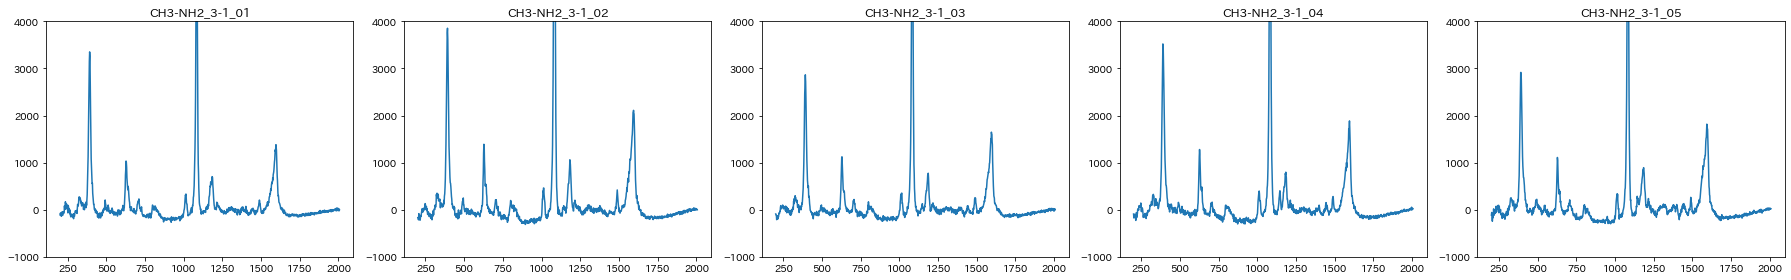

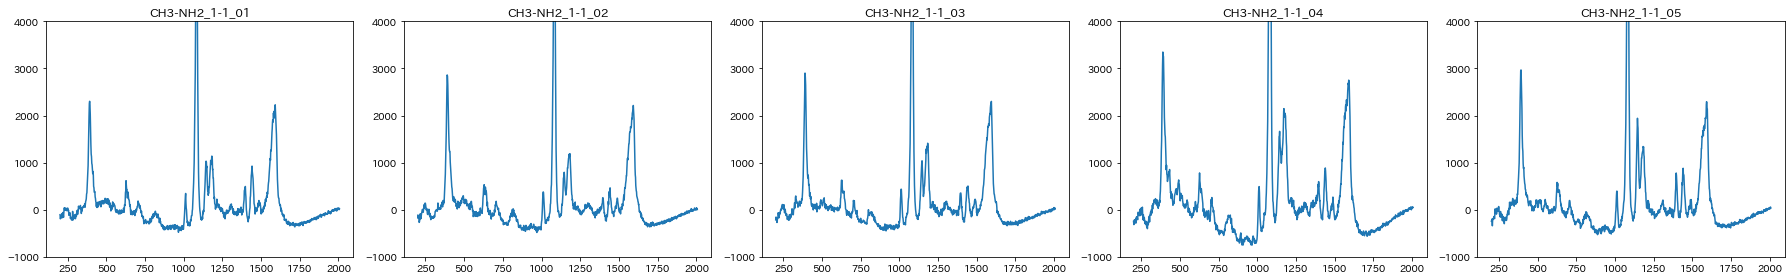

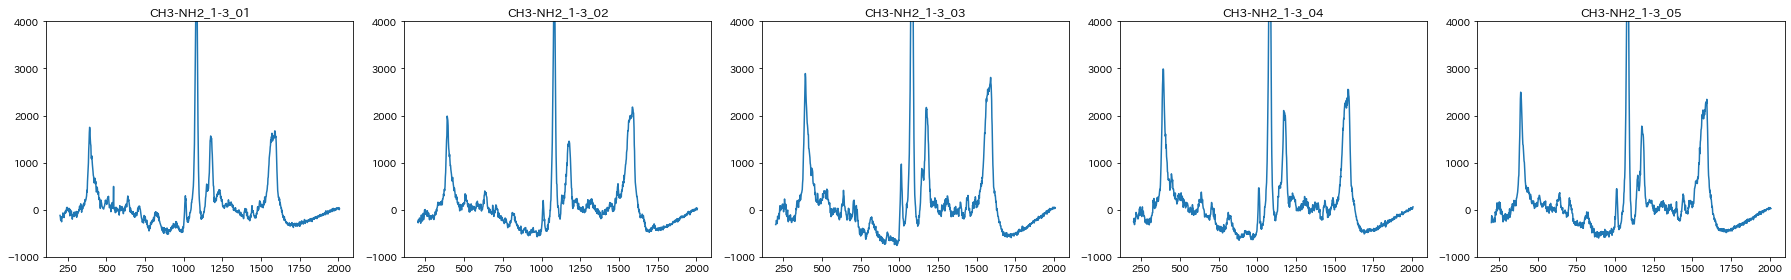

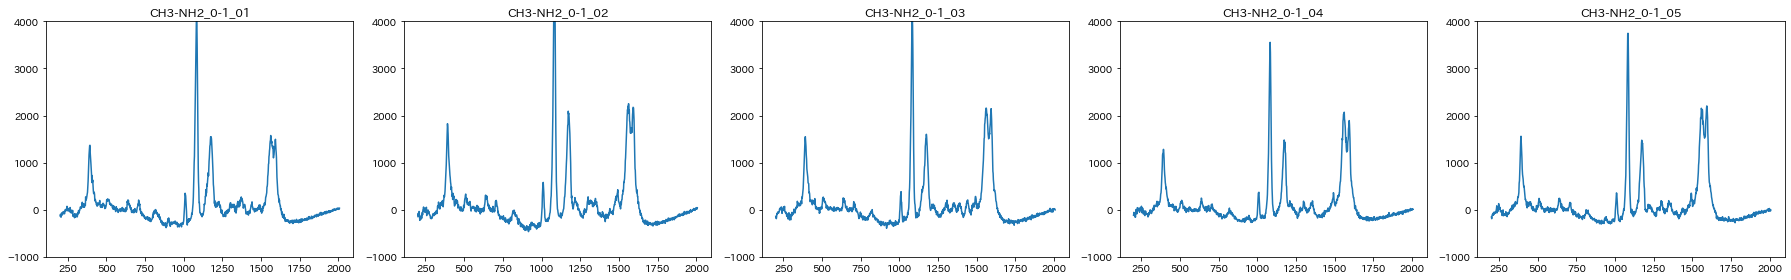

In [12]:
for df in df_list:
    yaxis_list = [y for y in df.columns if not 'Raman Shift' in y]
    plt.figure(figsize=(25, 4))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.plot(df['Raman Shift'] , df[yaxis_list[i]])
        plt.title(yaxis_list[i])
        plt.ylim(YLIM_MIN, YLIM_MAX)

        # x,y軸の目盛り設定
    
    # plt.xlabel(XLABEL, fontsize=FONTS_SIZE)
    # plt.ylabel(YLABEL, fontsize=FONTS_SIZE)
    # plt.xticks(fontsize=FONTS_SIZE)
    # plt.yticks(fontsize=FONTS_SIZE)
    plt.tight_layout()
    plt.show()

# データの前処理

In [5]:
scaled_df_list = []

# 最大強度を1にスケール化
for df in df_list:
    yaxis_list = [y for y in df.columns if not 'Raman Shift' in y]

    scaler = MinMaxScaler()
    series = scaler.fit_transform(df[yaxis_list])
    scaled_df = pd.DataFrame(series)
    scaled_df.columns = yaxis_list
    scaled_df.insert(0, 'Raman Shift', df['Raman Shift'])

    scaled_df_list.append(scaled_df)

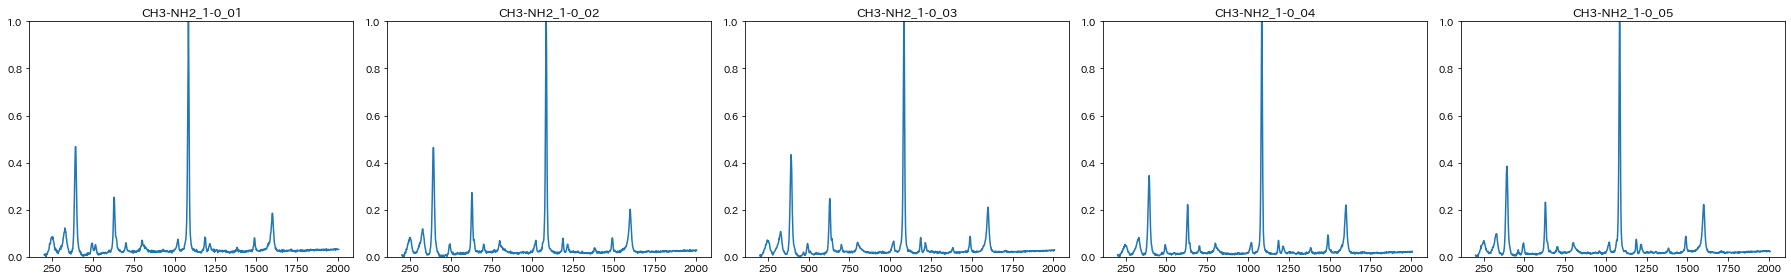

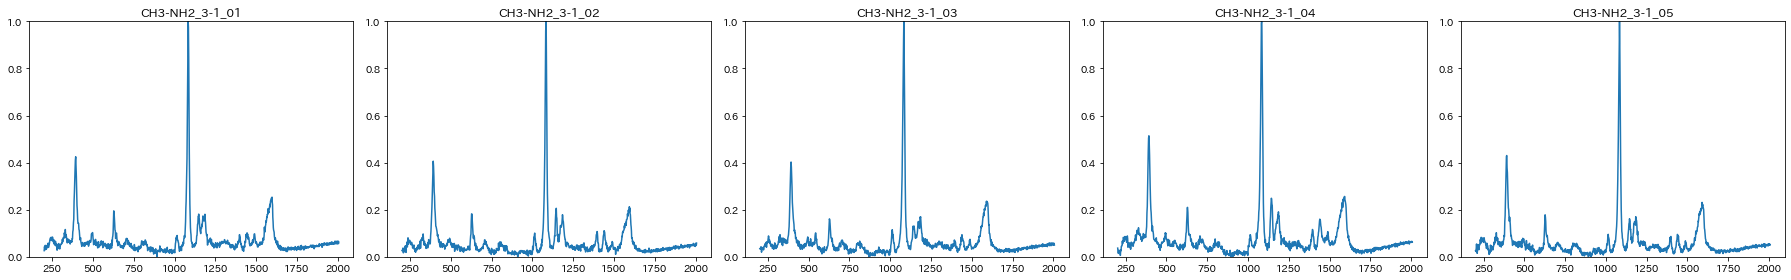

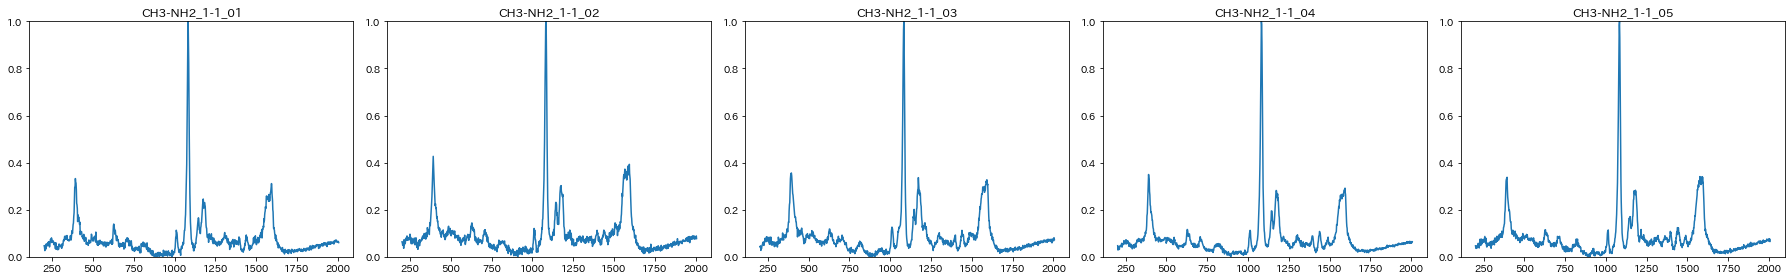

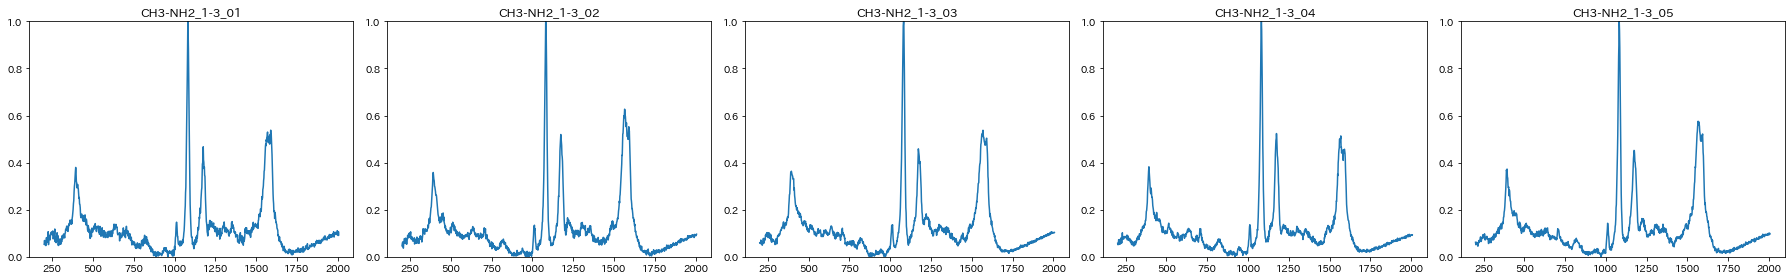

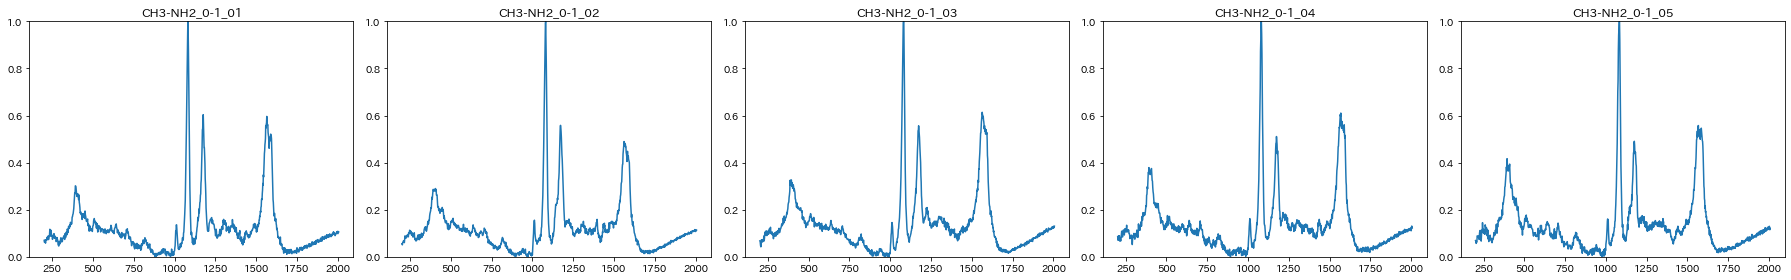

In [8]:
# Y軸の最大・最小の設定
YLIM_MIN = 0
YLIM_MAX = 1
for df in scaled_df_list:
    yaxis_list = [y for y in df.columns if not 'Raman Shift' in y]
    plt.figure(figsize=(25, 4))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.plot(df['Raman Shift'] , df[yaxis_list[i+25]])
        plt.title(yaxis_list[i])
        plt.ylim(YLIM_MIN, YLIM_MAX)

        # x,y軸の目盛り設定
        
    # plt.xlabel(XLABEL, fontsize=FONTS_SIZE)
    # plt.ylabel(YLABEL, fontsize=FONTS_SIZE)
    # plt.xticks(fontsize=FONTS_SIZE)
    # plt.yticks(fontsize=FONTS_SIZE)
    plt.tight_layout()
    plt.show()

In [6]:
# 解析用にデータフレームの形状を変更
RAMAN_SHIFT = df_list[0]['Raman Shift']
# label_list = ['CH3:COOH=1:0', 'CH3:COOH=3:1', 'CH3:COOH=1:1', 'CH3:COOH=1:3', 'CH3:COOH=0:1']
label_list = ['CH3:NH2=1:0', 'CH3:NH2=3:1', 'CH3:NH2=1:1', 'CH3:NH2=1:3', 'CH3:NH2=0:1']

for n, df in enumerate(scaled_df_list):
    df.loc[-1] = int(n)

data_df = pd.concat(scaled_df_list, axis=1)
data_df = data_df.drop(['Raman Shift'], axis=1)
data_df = data_df.T
# labelのみ別で保存
data_label = data_df[-1]
# label無しのデータフレーム
data_df = data_df.drop(-1, axis=1)
data_df.columns = RAMAN_SHIFT

In [15]:
# データの標準化
# yaxis_list = [y for y in data_df.columns if not 'Raman Shift' in y]

std_scaler = StandardScaler()
std_series = std_scaler.fit_transform(data_df)
std_data_df = pd.DataFrame(std_series)
std_data_df.columns = data_df.columns
std_data_df.index = data_df.index

std_data_df.head()

Raman Shift,201.192791,203.237476,205.281480,207.324801,209.367441,211.409400,213.450678,215.491276,217.531194,219.570432,...,1992.873612,1994.360356,1995.846670,1997.332555,1998.818009,2000.303035,2001.787631,2003.271798,2004.755536,2006.238845
CH3-NH2_1-0_01,-1.330248,-1.454315,-1.548510,-1.581735,-1.301068,-1.098730,-1.412844,-0.931305,-0.863562,-1.113224,...,-1.246424,-1.324207,-1.223611,-1.311459,-1.304552,-1.309339,-1.222963,-1.281628,-1.331945,-1.296388
CH3-NH2_1-0_02,-1.342406,-1.308211,-1.110897,-1.349942,-1.220183,-1.464943,-1.172267,-0.776704,-1.029031,-1.068172,...,-1.394196,-1.442948,-1.440632,-1.434824,-1.389157,-1.406293,-1.465713,-1.411018,-1.429443,-1.409851
CH3-NH2_1-0_03,-1.176217,-1.463902,-1.625722,-1.321275,-1.518012,-1.690362,-1.412143,-1.122671,-1.148480,-1.182121,...,-1.237980,-1.215044,-1.187276,-1.172815,-1.158915,-1.207670,-1.209045,-1.193671,-1.245824,-1.212091
CH3-NH2_1-0_04,-1.052398,-1.080615,-0.899849,-1.038422,-1.032377,-0.957135,-1.012505,-0.969117,-0.775274,-1.200772,...,-1.097466,-1.029927,-1.105496,-1.144730,-1.139761,-1.117071,-1.117970,-1.107920,-1.082383,-1.079831
CH3-NH2_1-0_05,-1.559310,-1.533924,-1.429224,-1.666426,-1.555863,-1.490123,-1.518169,-1.380786,-1.269398,-1.260591,...,-1.372534,-1.362767,-1.353029,-1.339432,-1.337230,-1.373021,-1.337542,-1.334678,-1.400858,-1.289349


# データフレームの保存

In [9]:
df_title = 'CH3_NH2'
save_df = data_df.copy()
save_df['label'] = data_label
save_df.to_pickle(excel_path + df_title + '.pkl')

# PCA

In [16]:
pca = PCA(n_components=2)

X = pca.fit_transform(data_df.values)
pca_result_df = pd.DataFrame(X)
pca_result_df.columns = ['PC1', 'PC2']
pca_result_df['label'] = data_label.values
pca_result_df.head()

,PC1,PC2,label
0,-1.985712,0.180589,0.0
1,-2.076743,0.221010,0.0
2,-1.941440,0.146685,0.0
3,-1.797861,0.113108,0.0
4,-1.998513,0.154738,0.0


In [17]:
data_1 = pca_result_df[pca_result_df['label'] == 0]
data_2 = pca_result_df[pca_result_df['label'] == 1]
data_3 = pca_result_df[pca_result_df['label'] == 2]
data_4 = pca_result_df[pca_result_df['label'] == 3]
data_5 = pca_result_df[pca_result_df['label'] == 4]

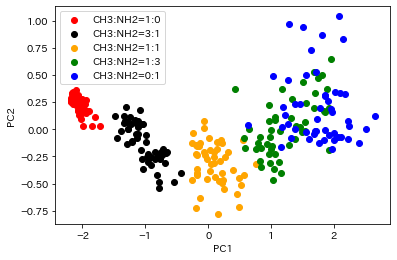

In [18]:
plt.scatter(data_1['PC1'], data_1['PC2'], c='red', label='CH3:NH2=1:0')
plt.scatter(data_2['PC1'], data_2['PC2'], c='black', label='CH3:NH2=3:1')
plt.scatter(data_3['PC1'], data_3['PC2'], c='orange', label='CH3:NH2=1:1')
plt.scatter(data_4['PC1'], data_4['PC2'], c='green', label='CH3:NH2=1:3')
plt.scatter(data_5['PC1'], data_5['PC2'], c='blue', label='CH3:NH2=0:1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.show()

In [19]:
# 寄与率の算出
df_exp_var_ratio = pd.DataFrame([pca.explained_variance_ratio_],columns=['PC1', 'PC2'])
df_exp_var_ratio.head()

,PC1,PC2
0,0.88126,0.038453


In [20]:
#各主成分の固有ベクトル
pca_vec_df = pd.DataFrame(pca.components_, columns=data_df.columns, index=['PC1', 'PC2'])
pca_vec_df

Raman Shift,201.192791,203.237476,205.281480,207.324801,209.367441,211.409400,213.450678,215.491276,217.531194,219.570432,...,1992.873612,1994.360356,1995.846670,1997.332555,1998.818009,2000.303035,2001.787631,2003.271798,2004.755536,2006.238845
PC1,0.014210,0.014768,0.014569,0.014536,0.014599,0.015334,0.015605,0.015156,0.014724,0.015634,...,0.019112,0.019430,0.019653,0.019638,0.019642,0.019458,0.019795,0.019803,0.019886,0.020106
PC2,-0.016158,-0.015842,-0.015238,-0.014552,-0.014352,-0.012692,-0.014573,-0.012460,-0.010099,-0.010756,...,-0.016179,-0.014201,-0.013892,-0.015991,-0.014828,-0.015897,-0.015457,-0.014044,-0.014854,-0.014523


<AxesSubplot:xlabel='Raman Shift'>

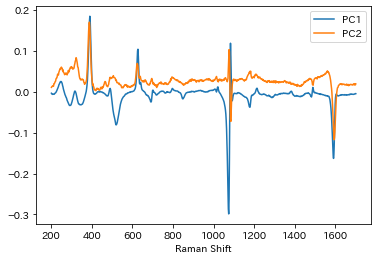

In [26]:
pca_vec_df.T.plot()

In [21]:
pca.explained_variance_

array([2.07244256, 0.0904296 ])

# 予測

In [22]:
def pca_svm(n_comp, data_df, label):
    # PCA処理
    pca = PCA(n_components=n_comp)
    X = pca.fit_transform(data_df.values)
    result_df = pd.DataFrame(X)
    result_df.columns = [f'PC{n+1}' for n in range(n_comp)]
    result_df['label'] = label.values

    # 寄与率の算出
    df_exp_var_ratio = pd.DataFrame([pca.explained_variance_ratio_],columns=[f'PC{n+1}' for n in range(n_comp)])
    #各主成分の固有ベクトル
    pca_vec_df = pd.DataFrame(pca.components_, columns=data_df.columns, index=[f'PC{n+1}' for n in range(n_comp)])

    # SVM処理
    # 特徴量とラベルの分割
    X = result_df[result_df.columns[result_df.columns != 'label']]
    y = result_df['label']
    oof = np.zeros(len(y))

    kf = KFold(n_splits=5, shuffle=True, random_state=1234)
    for train_idx, val_idx in kf.split(X):
        train_x, val_x = X.iloc[train_idx], X.iloc[val_idx]
        train_y, val_y = y.iloc[train_idx], y.iloc[val_idx]

        svm_model = SVC()
        svm_model.fit(train_x, train_y)
        y_pred = svm_model.predict(val_x)
        oof[val_idx] = y_pred

    cm = confusion_matrix(y, oof)
    # 正解率
    Accuracy = accuracy_score(y, oof)


    return df_exp_var_ratio, pca_vec_df, cm, Accuracy

In [23]:
# train_accuracy計算用
def train_pca_svm(n_comp, data_df, label):
    # PCA処理
    pca = PCA(n_components=n_comp)
    X = pca.fit_transform(data_df.values)
    result_df = pd.DataFrame(X)
    result_df.columns = [f'PC{n+1}' for n in range(n_comp)]
    result_df['label'] = label.values

    # 寄与率の算出
    df_exp_var_ratio = pd.DataFrame([pca.explained_variance_ratio_],columns=[f'PC{n+1}' for n in range(n_comp)])
    #各主成分の固有ベクトル
    pca_vec_df = pd.DataFrame(pca.components_, columns=data_df.columns, index=[f'PC{n+1}' for n in range(n_comp)])

    # SVM処理
    # 特徴量とラベルの分割
    X = result_df[result_df.columns[result_df.columns != 'label']]
    y = result_df['label']

    svm_model = SVC()
    svm_model.fit(X, y)
    y_pred = svm_model.predict(X)

    cm = confusion_matrix(y, y_pred)
    # 正解率
    Accuracy = accuracy_score(y, y_pred)


    return df_exp_var_ratio, pca_vec_df, cm, Accuracy

# PCA_SVMの検討

In [24]:
# n_components = 2
raitio_2, _, cm_2, accuracy_2 = pca_svm(2, data_df, data_label)
print(raitio_2)
print(accuracy_2)

       PC1       PC2
0  0.88126  0.038453
0.888


<AxesSubplot:>

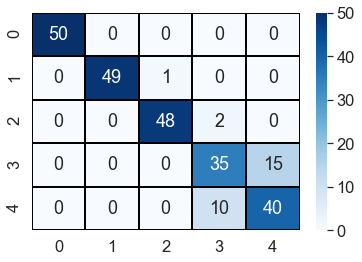

In [25]:
sns.set(font_scale=1.5)
sns.heatmap(cm_2, annot=True, cmap='Blues', linecolor='black', linewidths=1)

In [26]:
# n_components = 3
raitio_3, _, cm_3, accuracy_3 = pca_svm(3, data_df, data_label)
print(raitio_3)
print(accuracy_3)

       PC1       PC2       PC3
0  0.88126  0.038453  0.014648
0.892


<AxesSubplot:>

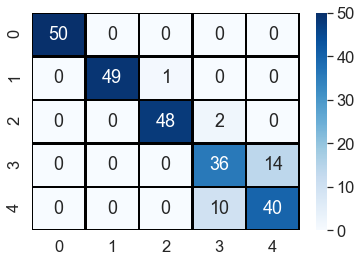

In [27]:
sns.set(font_scale=1.5)
sns.heatmap(cm_3, annot=True, cmap='Blues', linecolor='black', linewidths=1.5)

## 学習データでの精度

In [28]:
# train_accuracy
train_raitio_3, _, train_cm_3, train_accuracy_3 = train_pca_svm(3, data_df, data_label)
print(train_raitio_3)
print(train_accuracy_3)

       PC1       PC2       PC3
0  0.88126  0.038453  0.014648
0.892


<AxesSubplot:>

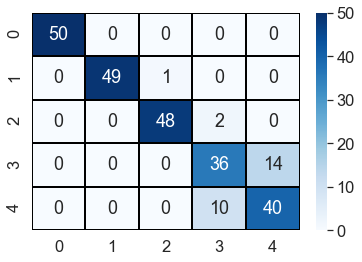

In [29]:
sns.set(font_scale=1.5)
sns.heatmap(train_cm_3, annot=True, cmap='Blues', linecolor='black', linewidths=1)

## ここまで

In [91]:
# 標準化データでの予測
std_raitio_3, _, std_cm_3, std_accuracy_3 = pca_svm(3, std_data_df, data_label)
print(std_raitio_3)
print(std_accuracy_3)

        PC1       PC2       PC3
0  0.440292  0.180613  0.055657
0.82


<AxesSubplot:>

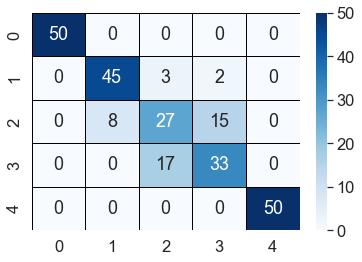

In [92]:
sns.set(font_scale=1.5)
sns.heatmap(std_cm_3, annot=True, cmap='Blues', linecolor='black', linewidths=1)

In [33]:
# n_components = 5
raitio_5, _, cm_5, accuracy_5 = pca_svm(5, data_df, data_label)
print(raitio_5)
print(accuracy_5)

        PC1      PC2       PC3       PC4       PC5
0  0.767717  0.07958  0.051269  0.016162  0.013143
0.964


<AxesSubplot:>

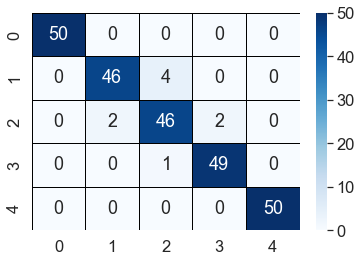

In [34]:
sns.set(font_scale=1.5)
sns.heatmap(cm_5, annot=True, cmap='Blues', linecolor='black', linewidths=1)

# SVM単体での解析

In [30]:
def svm_only(data_df, label):
    # SVM処理
    # 特徴量とラベルの分割
    X = data_df
    X.columns = [str(i) for i in data_df.columns]
    y = label
    oof = np.zeros(len(y))

    kf = KFold(n_splits=5, shuffle=True, random_state=1234)
    for train_idx, val_idx in kf.split(X):
        train_x, val_x = X.iloc[train_idx], X.iloc[val_idx]
        train_y, val_y = y.iloc[train_idx], y.iloc[val_idx]

        svm_model = SVC()
        svm_model.fit(train_x, train_y)
        y_pred = svm_model.predict(val_x)
        oof[val_idx] = y_pred

    cm = confusion_matrix(y, oof)
    # 正解率
    Accuracy = accuracy_score(y, oof)

    return cm, Accuracy

In [31]:
cm_svm, accuracy_svm = svm_only(data_df, data_label)
print('Accuracy:', accuracy_svm)

Accuracy: 0.892


<AxesSubplot:>

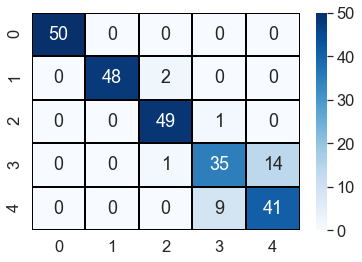

In [32]:
sns.set(font_scale=1.5)
sns.heatmap(cm_svm, annot=True, cmap='Blues', linecolor='black', linewidths=1)

In [93]:
# 標準化データでの予測
std_cm_svm, std_accuracy_svm = svm_only(std_data_df, data_label)
print('Accuracy:', std_accuracy_svm)

Accuracy: 0.876


<AxesSubplot:>

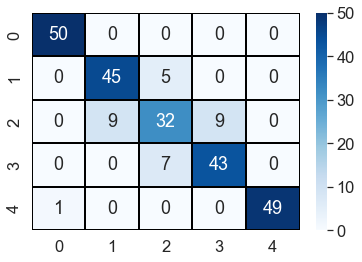

In [175]:
sns.set(font_scale=1.5)
sns.heatmap(std_cm_svm, annot=True, cmap='Blues', linecolor='black', linewidths=1.5)

## 学習データでの精度

In [33]:
def train_svm_only(data_df, label):
    # SVM処理
    # 特徴量とラベルの分割
    X = data_df
    X.columns = [str(i) for i in data_df.columns]
    y = label

    svm_model = SVC()
    svm_model.fit(X, y)
    y_pred = svm_model.predict(X)

    cm = confusion_matrix(y, y_pred)
    # 正解率
    Accuracy = accuracy_score(y, y_pred)

    return cm, Accuracy

In [34]:
train_cm_svm, train_accuracy_svm = train_svm_only(data_df, data_label)
print('Accuracy:', train_accuracy_svm)

Accuracy: 0.912


# Linear Discriminant Analysis(LDA)

explained variance ratio (first two components): [0.93018044 0.05081734]


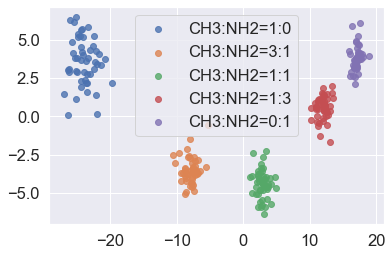

In [35]:
lda = LDA(n_components=2)
X_r2 = lda.fit(data_df, data_label).transform(data_df)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(lda.explained_variance_ratio_))

plt.figure()
for i, label_name in zip([0, 1, 2, 3, 4], label_list):
    plt.scatter(X_r2[data_label == i, 0], X_r2[data_label == i, 1], alpha=.8,
    label=label_name)

plt.legend(loc='best', scatterpoints=1)
plt.show()

In [36]:
lda_result_df = pd.DataFrame(X_r2)
lda_result_df.columns = ['LDA1', 'LDA2']
lda_result_df['label'] = data_label.values
lda_result_df.head()

,LDA1,LDA2,label
0,-23.263988,5.821109,0.0
1,-24.998971,2.866580,0.0
2,-25.614665,4.109263,0.0
3,-26.172707,3.073477,0.0
4,-25.765935,4.823929,0.0


In [37]:
def lda_prediction(n_comp, data_df, label):

    X = data_df
    y = label
    oof = np.zeros(len(y))

    kf = KFold(n_splits=5, shuffle=True, random_state=1234)
    for train_idx, val_idx in kf.split(X):
        train_x, val_x = X.iloc[train_idx], X.iloc[val_idx]
        train_y, val_y = y.iloc[train_idx], y.iloc[val_idx]

        lda_model = LDA(n_components=n_comp)
        lda_model.fit(train_x, train_y)
        y_pred = lda_model.predict(val_x)
        oof[val_idx] = y_pred

    cm = confusion_matrix(y, oof)
    # 正解率
    Accuracy = accuracy_score(y, oof)

    return cm, Accuracy

In [38]:
cm_lda2, accuracy_lda2 = lda_prediction(2, data_df, data_label)
print('Accuracy:', accuracy_lda2)

Accuracy: 0.956


<AxesSubplot:>

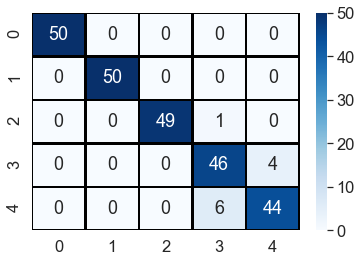

In [39]:
sns.set(font_scale=1.5)
sns.heatmap(cm_lda2, annot=True, cmap='Blues', linecolor='black', linewidths=1.5)

In [95]:
# 標準化データでの予測
std_cm_lda2, std_accuracy_lda2 = lda_prediction(2, std_data_df, data_label)
print('Accuracy:', std_accuracy_lda2)

Accuracy: 0.952


<AxesSubplot:>

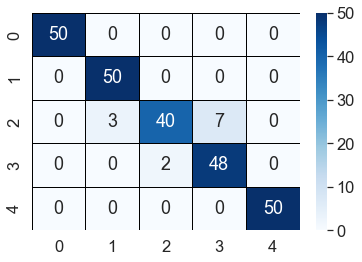

In [96]:
sns.set(font_scale=1.5)
sns.heatmap(std_cm_lda2, annot=True, cmap='Blues', linecolor='black', linewidths=1)

In [40]:
cm_lda3, accuracy_lda3 = lda_prediction(3, data_df, data_label)
print('Accuracy:', accuracy_lda3)

Accuracy: 0.956


<AxesSubplot:>

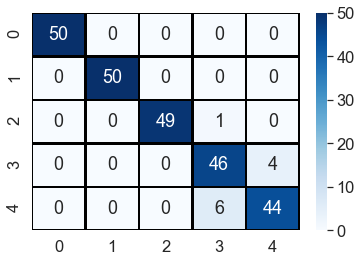

In [41]:
sns.set(font_scale=1.5)
sns.heatmap(cm_lda3, annot=True, cmap='Blues', linecolor='black', linewidths=1.5)

## 学習データでの精度

In [42]:
def train_lda_prediction(n_comp, data_df, label):

    X = data_df
    y = label

    lda_model = LDA(n_components=n_comp)
    lda_model.fit(X, y)
    y_pred = lda_model.predict(X)

    cm = confusion_matrix(y, y_pred)
    # 正解率
    Accuracy = accuracy_score(y, y_pred)

    return cm, Accuracy

In [43]:
train_cm_lda2, train_accuracy_lda2 = train_lda_prediction(2, data_df, data_label)
print('Accuracy:', train_accuracy_lda2)

Accuracy: 1.0


# DTWによるクラスタリング

In [15]:
dtw_data = TimeSeriesScalerMeanVariance().fit_transform(data_df)

km_euclidean = TimeSeriesKMeans(n_clusters=5, random_state=42, metric="dtw")
dtw_labels = km_euclidean.fit_predict(dtw_data)

In [16]:
dtw_labels

array([4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 1,
       4, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1,
       4, 4, 4, 4, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 3, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
dtw_df = pd.DataFrame()
dtw_df['label'] = data_label
dtw_df['cluster'] = dtw_labels
dtw_df

,label,cluster
CH3-COOH_1-0_01,0.0,4
CH3-COOH_1-0_02,0.0,4
CH3-COOH_1-0_03,0.0,4
CH3-COOH_1-0_04,0.0,1
CH3-COOH_1-0_05,0.0,4
...,...,...
CH3-COOH_0-1_46,4.0,0
CH3-COOH_0-1_47,4.0,0
CH3-COOH_0-1_48,4.0,0
CH3-COOH_0-1_49,4.0,0


# t-SNEによるクラスタリング

In [66]:
tsne = TSNE(n_components=2, random_state=0, init='pca')

X = tsne.fit_transform(data_df.values)
tsne_result_df = pd.DataFrame(X)
tsne_result_df.columns = ['tSNE1', 'tSNE2']
tsne_result_df['label'] = data_label.values
tsne_result_df.head()

,tSNE1,tSNE2,label
0,-27.493601,8.562120,0.0
1,-28.362837,7.786880,0.0
2,-28.089926,9.198884,0.0
3,-28.206404,9.853809,0.0
4,-28.565287,9.002044,0.0


In [67]:
data_1 = tsne_result_df[tsne_result_df['label'] == 0]
data_2 = tsne_result_df[tsne_result_df['label'] == 1]
data_3 = tsne_result_df[tsne_result_df['label'] == 2]
data_4 = tsne_result_df[tsne_result_df['label'] == 3]
data_5 = tsne_result_df[tsne_result_df['label'] == 4]

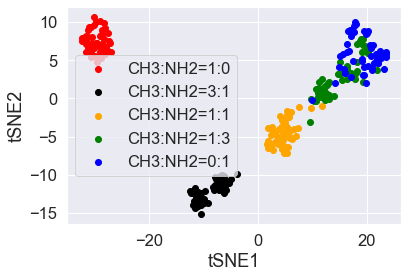

In [68]:
plt.scatter(data_1['tSNE1'], data_1['tSNE2'], c='red', label='CH3:NH2=1:0')
plt.scatter(data_2['tSNE1'], data_2['tSNE2'], c='black', label='CH3:NH2=3:1')
plt.scatter(data_3['tSNE1'], data_3['tSNE2'], c='orange', label='CH3:NH2=1:1')
plt.scatter(data_4['tSNE1'], data_4['tSNE2'], c='green', label='CH3:NH2=1:3')
plt.scatter(data_5['tSNE1'], data_5['tSNE2'], c='blue', label='CH3:NH2=0:1')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.legend(loc='best')
plt.show()

# t-SNE_SVMの解析

In [71]:
def tsne_svm(n_comp, data_df, label):
    # t-SNE処理
    tsne = TSNE(n_components=n_comp, random_state=0, init='pca')
    X = tsne.fit_transform(data_df.values)
    result_df = pd.DataFrame(X)
    result_df.columns = [f'TSNE{n+1}' for n in range(n_comp)]
    result_df['label'] = label.values

    # SVM処理
    # 特徴量とラベルの分割
    X = result_df[result_df.columns[result_df.columns != 'label']]
    y = result_df['label']
    oof = np.zeros(len(y))

    kf = KFold(n_splits=5, shuffle=True, random_state=1234)
    for train_idx, val_idx in kf.split(X):
        train_x, val_x = X.iloc[train_idx], X.iloc[val_idx]
        train_y, val_y = y.iloc[train_idx], y.iloc[val_idx]

        svm_model = SVC()
        svm_model.fit(train_x, train_y)
        y_pred = svm_model.predict(val_x)
        oof[val_idx] = y_pred

    cm = confusion_matrix(y, oof)
    # 正解率
    Accuracy = accuracy_score(y, oof)

    return cm, Accuracy

In [72]:
# componet=2
cm_tsne_svm, accuracy_tsne_svm = tsne_svm(2, data_df, data_label)
print('Accuracy:', accuracy_tsne_svm)

Accuracy: 0.88


<AxesSubplot:>

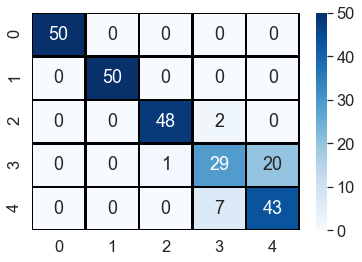

In [73]:
sns.set(font_scale=1.5)
sns.heatmap(cm_tsne_svm, annot=True, cmap='Blues', linecolor='black', linewidths=1.5)

In [100]:
# 標準化データでの予測
# componet=2
std_cm_tsne_svm, std_accuracy_tsne_svm = tsne_svm(2, std_data_df, data_label)
print('Accuracy:', std_accuracy_tsne_svm)

c:\Users\west7\anaconda3\envs\xeus-python\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Accuracy: 0.72


In [54]:
# componet=3
cm_tsne_svm, accuracy_tsne_svm = tsne_svm(3, data_df, data_label)
print('Accuracy:', accuracy_tsne_svm)

c:\Users\west7\anaconda3\envs\xeus-python\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\west7\anaconda3\envs\xeus-python\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Accuracy: 0.764


<AxesSubplot:>

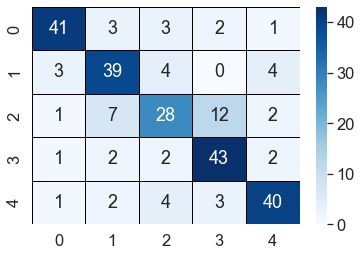

In [55]:
sns.set(font_scale=1.5)
sns.heatmap(cm_tsne_svm, annot=True, cmap='Blues', linecolor='black', linewidths=1)

## 学習データでの精度

In [130]:
def train_tsne_svm(n_comp, data_df, label):
    # t-SNE処理
    tsne = TSNE(n_components=n_comp, random_state=0, init='pca', learning_rate='auto')
    X = tsne.fit_transform(data_df.values)
    result_df = pd.DataFrame(X)
    result_df.columns = [f'TSNE{n+1}' for n in range(n_comp)]
    result_df['label'] = label.values

    # SVM処理
    # 特徴量とラベルの分割
    X = result_df[result_df.columns[result_df.columns != 'label']]
    y = result_df['label']

    svm_model = SVC()
    svm_model.fit(X, y)
    y_pred = svm_model.predict(X)

    cm = confusion_matrix(y, y_pred)
    # 正解率
    Accuracy = accuracy_score(y, y_pred)

    return cm, Accuracy

In [131]:
# componet=2
train_cm_tsne_svm, train_accuracy_tsne_svm = train_tsne_svm(2, data_df, data_label)
print('Accuracy:', train_accuracy_tsne_svm)

c:\Users\west7\anaconda3\envs\xeus-python\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Accuracy: 0.956


# 決定木によるクラスタリング

In [46]:
def decision_tree(data_df, label, max_depth):
    # 特徴量とラベルの分割
    X = data_df
    X.columns = [str(i) for i in data_df.columns]
    y = label
    oof = np.zeros(len(y))

    kf = KFold(n_splits=5, shuffle=True, random_state=1234)
    for train_idx, val_idx in kf.split(X):
        train_x, val_x = X.iloc[train_idx], X.iloc[val_idx]
        train_y, val_y = y.iloc[train_idx], y.iloc[val_idx]

        dt_model = DecisionTreeClassifier(max_depth=max_depth, 
                                          min_samples_split=2,
                                          min_samples_leaf=1,
                                          max_leaf_nodes=None,
                                          random_state=1234)
        
        dt_model.fit(train_x, train_y)
        y_pred = dt_model.predict(val_x)
        oof[val_idx] = y_pred

    cm = confusion_matrix(y, oof)
    # 正解率
    Accuracy = accuracy_score(y, oof)

    return cm, Accuracy

In [103]:
max_depth = 3
cm_dt, accuracy_dt = decision_tree(data_df, data_label, max_depth)
print('Accuracy:', accuracy_dt)

Accuracy: 0.892


<AxesSubplot:>

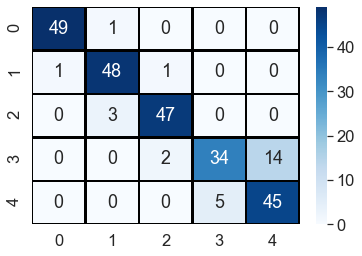

In [104]:
sns.set(font_scale=1.5)
sns.heatmap(cm_dt, annot=True, cmap='Blues', linecolor='black', linewidths=1.5)

## 学習データでの精度

In [49]:
def train_decision_tree(data_df, label, max_depth):
    # 特徴量とラベルの分割
    X = data_df
    X.columns = [str(i) for i in data_df.columns]
    y = label

    dt_model = DecisionTreeClassifier(max_depth=max_depth, 
                                        min_samples_split=2,
                                        min_samples_leaf=1,
                                        max_leaf_nodes=None,
                                        random_state=1234)
    
    dt_model.fit(X, y)
    y_pred = dt_model.predict(X)

    cm = confusion_matrix(y, y_pred)
    # 正解率
    Accuracy = accuracy_score(y, y_pred)

    return cm, Accuracy

In [105]:
max_depth = 3
train_cm_dt, train_accuracy_dt = train_decision_tree(data_df, data_label, max_depth)
print('Accuracy:', train_accuracy_dt)

Accuracy: 0.956


# MLPによるクラスタリング

In [92]:
def MLP(data_df, label):
    # 特徴量とラベルの分割
    X = data_df
    X.columns = [str(i) for i in data_df.columns]
    y = label
    oof = np.zeros(len(y))

    kf = KFold(n_splits=5, shuffle=True, random_state=1234)
    for train_idx, val_idx in kf.split(X):
        train_x, val_x = X.iloc[train_idx], X.iloc[val_idx]
        train_y, val_y = y.iloc[train_idx], y.iloc[val_idx]

        MLP_model = MLPClassifier(hidden_layer_sizes=(100, 100),
                                  activation='logistic', # logistic, tanh, relu
                                  solver='adam',
                                  max_iter=1000,
                                  random_state=1234)
        
        MLP_model.fit(train_x, train_y)
        y_pred = MLP_model.predict(val_x)
        oof[val_idx] = y_pred

    cm = confusion_matrix(y, oof)
    # 正解率
    Accuracy = accuracy_score(y, oof)

    return cm, Accuracy

In [93]:
cm_MLP, accuracy_MLP= MLP(data_df, data_label)
print('Accuracy:', accuracy_MLP)

Accuracy: 0.984


<AxesSubplot:>

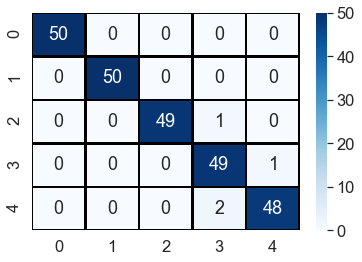

In [94]:
sns.set(font_scale=1.5)
sns.heatmap(cm_MLP, annot=True, cmap='Blues', linecolor='black', linewidths=1.5)

In [148]:
# 標準化データでの予測
std_cm_MLP, std_accuracy_MLP = MLP(std_data_df, data_label)
print('Accuracy:', std_accuracy_MLP)

Accuracy: 0.924


## 学習データでの精度

In [106]:
def train_MLP(data_df, label):
    # 特徴量とラベルの分割
    X = data_df
    X.columns = [str(i) for i in data_df.columns]
    y = label

    MLP_model = MLPClassifier(hidden_layer_sizes=(100, 100),
                                activation='logistic',
                                solver='adam',
                                max_iter=1000,
                                random_state=1234)
    
    MLP_model.fit(X, y)
    y_pred = MLP_model.predict(X)

    cm = confusion_matrix(y, y_pred)
    # 正解率
    Accuracy = accuracy_score(y, y_pred)

    return cm, Accuracy

In [107]:
train_cm_MLP, train_accuracy_MLP = MLP(data_df, data_label)
print('Accuracy:', train_accuracy_MLP)

Accuracy: 0.984


<AxesSubplot:>

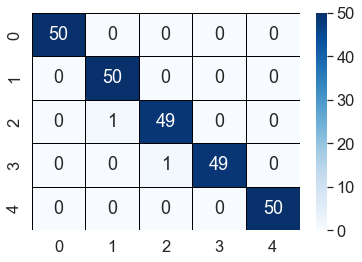

In [171]:
sns.set(font_scale=1.5)
sns.heatmap(train_cm_MLP, annot=True, cmap='Blues', linecolor='black', linewidths=1)

# データのExcel化

In [98]:
graph_title = 'raw_data'

with pd.ExcelWriter(excel_path + graph_title + '.xlsx') as writer:
    for n, df in enumerate(df_list):
        df.to_excel(writer, sheet_name=f'data_{n+1}', index=False)

In [99]:
graph_title = 'pca_result'
pca_result_df.to_excel(excel_path + graph_title + '.xlsx', index=False)

In [100]:
graph_title = 'vector'
pca_vec_df.T.to_excel(excel_path + graph_title + '.xlsx', index=False)

In [101]:
graph_title = 'lda_result'
lda_result_df.to_excel(excel_path + graph_title + '.xlsx', index=False)

In [102]:
graph_title = 'tsne_result'
tsne_result_df.to_excel(excel_path + graph_title + '.xlsx', index=False)